In [195]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpl_style

from icecream import ic
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

# import svm from sklearn


from kernal import linear, polynomial, rbf

# Ej 1

### a) Construct a set 'TP3-1' of linearly separable examples at < 2 (e.g., randomly generate points in [0, 5]x[0, 5] such that they belong to two linearly separable classes 1 and -1). Use a simple step perceptron to separate the ensemble linearly. Is the separation hyperplane optimal? Justify the answer.

§

### Defenitions for plotting and perceptron

In [196]:
# This is for the spliting line function

'''
n_items = the amount of items generated randomly in [0,5][0,5]
b0 = the bias
b1 and b2 = the weights of the line on which the class split is made.

Class is eiter 1 or -1 depending on if it's above or below the line
'''

n_items = 100
b0 = 0.5
b1 = -1
b2 = 2

In [197]:
def plotting(data, b0=b0, b1=b1, b2=b2, line=True, legend=True):
    
    '''
    This will plot the scatterplot of the data and the line. It's for visualisation only
    Choose a different b0, b1, b2 to plot a different line if you want
    line = true will draw this line, false won'test_1
    Legend = true removes the legend. This might be anoying with some plots  
    '''

    #For the line in the plot
    if line:
        x1_for_line = np.linspace(0, 5, 100)
        x2_for_line = (-b0 - b1 * x1_for_line) / b2

    plt.figure(figsize=(5, 4))
    plt.plot(x1_for_line, x2_for_line, label=f'{round(b0)} + {round(b1)}x1 + {round(b2)}x2', color='blue')
    plt.scatter(data['x1'], data['x2'], label='Data', c=data['y'], marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axhline(0, color='grey', linewidth=0.5)
    plt.axvline(0, color='grey', linewidth=0.5)
    
    if legend:    
        plt.legend()
    plt.show()

In [203]:
def report(test_data, weights, bias):

    '''
    test data = unseen data
    weights = weights of the model like [w1, w2]
    bias = bias of the model
    '''
    
    y_pred_1 = np.dot(test_data[['x1', 'x2']].values, weights) + bias
    y_pred_1 = np.where(y_pred_1 > 0, 1, -1)

    # Calculate the classification report from sklearn metrics
    report = classification_report(test_data['y'], y_pred_1)
    print(report)

In [199]:
# perceptron
def perceptron_train(X, y, learning_rate=0.1, n_epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for _ in range(n_epochs):
        for i in range(n_samples):
            prediction = np.dot(X[i], weights) + bias
            if prediction > 0:
                y_pred = 1
            else:
                y_pred = -1
            
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
    
    return weights, bias

### Data creation
train_1, test_1, train_2, test_2

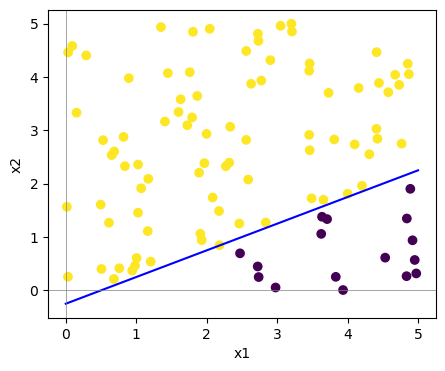

In [200]:
# the following is for the linespace representation of the line in the plot
x1_for_line = np.linspace(0, 5, 100)
x2_for_line = (-b0 - b1 * x1_for_line) / b2

x1 = [random.uniform(0, 5) for i in range(n_items)]
x2 = [random.uniform(0, 5) for i in range(n_items)]
y = [1 if (b0 + b1 * x1[i] + b2 * x2[i]) > 0 else -1 for i in range(n_items)]

# create TP3_1, TP3_2, and creating a train test split
TP3_1 = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
TP3_2 = TP3_1.copy()
train_1, test_1 = train_test_split(TP3_1, test_size=0.3)
train_2, test_2 = train_test_split(TP3_2, test_size=0.3)

plotting(TP3_1, b0, b1, b2, legend=False)

### Training

In [201]:
# perform the perceptron training
weights, bias = perceptron_train(train_1[['x1', 'x2']].values, train_1['y'].values, n_epochs=100, learning_rate=0.1)

### Prediction and testing

In [207]:
report(test_1, weights, bias)

# The report is avtually very nice. F1 of 1 an precision of 1 as well
# All the test datapoints are classified correctly 

# This changes thought when using higher sample sizes but it will remain high

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        22

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




### b) Obtain the optimal hyperplane from the hyperplane obtained with the perceptron simple.

Normalizing factor: 1.25
Final weights: [-0.26625807  0.26724766]
Final bias: 0.5

Hyperplane: 0.5 + -0.27x1 + 0.27x2


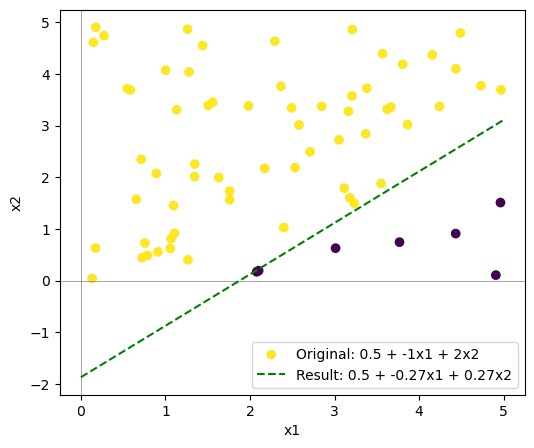

In [ ]:
# First normalize the model to b0 so that the models b0 will be the same as the generated data b0
normalizing_factor = b0/bias
weights_normalized = weights * normalizing_factor
bias_normalized = bias * normalizing_factor

print(f'Normalizing factor: {normalizing_factor}')
print(f'Final weights: {weights_normalized}\nFinal bias: {bias_normalized}\n\nHyperplane: {bias_normalized.round(2)} + {weights_normalized[0].round(2)}x1 + {weights_normalized[1].round(2)}x2')

# plotting the output
x_boundary = np.linspace(0, 5, 100)
y_boundary = (-weights[0] * x_boundary - bias) / weights[1]

# plotting the output
plt.figure(figsize=(6, 5))
plt.scatter(train_1['x1'], train_1['x2'], label=f"Original: {b0} + {b1}x1 + {b2}x2", c=train_1['y'], marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.plot(x_boundary, y_boundary, label=f"Result: {round(bias_normalized, 2)} + {round(weights_normalized[0], 2)}x1 + {weights_normalized[1].round(2)}x2", color='green', linestyle='--')
plt.legend()
plt.show()

### c) Construct the set 'TP3-2' in an analogous way to how you constructed the set 'TP3-1' but this time include some examples that are misclassified near the separating hyperplane. Use a simple perceptron to separate the two classes. Comment on the results.

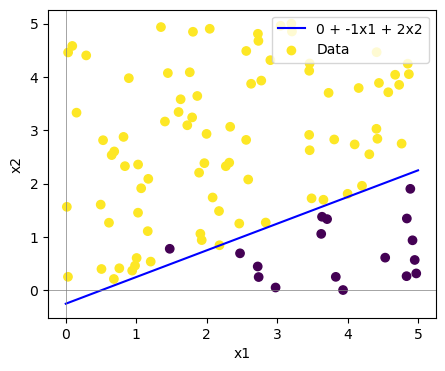

In [208]:
n_additional_points = round(n_items / 2)
additional_data = []

# Generate additional data points near the separating hyperplane
for _ in range(n_additional_points):
    x1_new = random.uniform(0, 5)
    x2_new = random.uniform(0, 5)
    
    # Calculate the distance from the point to the separating hyperplane
    distance = abs(b0 + b1 * x1_new + b2 * x2_new) / (b1 ** 2 + b2 ** 2) ** 0.5
    
    # Check if the distance is less than 0.5 (within 0.5 units from the hyperplane), if so, append.
    if distance <= 0.5:
        class_label = 1 if not (b0 + b1 * x1_new + b2 * x2_new) > 0 else -1
        additional_data.append({'x1': x1_new, 'x2': x2_new, 'y': (class_label)}) # for some reason it does it oposite so -1 to fix


additional_df = pd.DataFrame(additional_data)
TP3_2 = pd.concat([TP3_2, additional_df], ignore_index=False)

plotting(TP3_2)

### d) Use SVM to classify both set 'TP3-1' and set 'TP3-2'. Compare the results with those obtained in points a) and c).


In [209]:
# Very small sampledata dict below. Might be nice for quicker testing of a working svm
# data_2_dict = {-1: np.array([[1, 7], [2, 8], [3, 8]]), 
#                 1: np.array([[5, 1], [6, -1], [7, 3]])
#                 }

def create_dict(data):
    data_2_dict = {-1: np.array([i for i in data[data['y'] == -1][['x1', 'x2']].values]),
                    1: np.array([i for i in data[data['y'] == 1][['x1', 'x2']].values])}
    return data_2_dict

data_2_dict = create_dict(TP3_1)


In [233]:
class SVM:
    '''
    fit() uses data in a dictionary with -1: np.array(...) and 1: np.array(...)
    predict() uses a list of features
    '''

    def __init__(self, visualization=False):
        self.visualization = visualization
        self.colors = {1: 'y', -1: 'b'}
        # if self.visualization:
        #     self.fig = plt.figure(figsize=(6, 5))
        #     self.ax = self.fig.add_subplot(1, 1, 1)

    def fit(self, data):
        self.data = data
        opt_dic = {}

        transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]

        all_data = []                                   # Iterate through the dict rows
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)          # Produces only one higest number of all data
        self.min_feature_value = min(all_data)          # Set to float because of an error in line 51 (for b in np.arange loop)
        all_data = None                                 # clears memory

        # Support vectors yi(xi.w + b) = 1
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01, self.max_feature_value * 0.001]

        b_range_multiple = 5 #5
        b_multiple = 5 #5
        latest_optimum = self.max_feature_value * 10 #10

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False

            while not optimized:
                for b in np.arange(-1 * (float(self.max_feature_value) * b_range_multiple), 
                                   (float(self.max_feature_value) * b_range_multiple),
                                   step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True               

                        # Iterate through DataFrame rows
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    break

                            if found_option:
                                opt_dic[np.linalg.norm(w_t)] = [w_t, b]
            
                if w[0] < 0:    
                    optimized = True
                    print(f"Optimized a step: {step}")
                else:
                    w = w - step

            norms = sorted([n for n in opt_dic])
            opt_choice = opt_dic[norms[0]]
            self.w = opt_choice[0] * (1e14)                                 # TODO - I added the multiplication here.....
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2

        return self.w, self.b



    # TODO - This needs to be fixed and updated to my new datastructure
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    


    def visualize(self):

        self.fig = plt.figure(figsize=(6, 5))
        self.ax = self.fig.add_subplot(1, 1, 1)

        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in self.data[i]] for i in self.data]  # they did data_dict, i used self.data[i].... might be a problem

        def hyperplane(x, w, b, v):
            return (-w[0] * x - b + v) / w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)    # I might want to change stuff here i guess to involve M into it
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # Positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

        # Negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

        # Decision boundary
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')

        self.ax.set_xlabel('x1')
        self.ax.set_ylabel('x2')
        self.ax.axhline(0, color='grey', linewidth=0.5)
        self.ax.axvline(0, color='grey', linewidth=0.5)

        plt.show()

In [221]:
svm = SVM()
w, b = svm.fit(data=data_2_dict)

# TODO - for some reason, the weights are very very very big. IDk why but look into this. Maybe some True/False values are wrongly placed. Go over te code again.
print(f"w = {w}\nb = {b}")

Optimized a step: 0.4997912236505932
Optimized a step: 0.04997912236505932
Optimized a step: 0.004997912236505931
w = [ 11.7329757 -11.7329757]
b = -1.024572008483883


In [235]:
class SVM:
    '''
    fit() uses data in a dictionary with -1: np.array(...) and 1: np.array(...)
    predict() uses a list of features
    '''

    def __init__(self, visualization=False):
        self.visualization = visualization
        self.colors = {1: 'y', -1: 'b'}
        # if self.visualization:
        #     self.fig = plt.figure(figsize=(6, 5))
        #     self.ax = self.fig.add_subplot(1, 1, 1)

    def fit(self, data):
        self.data = data
        opt_dic = {}

        transforms = [[1, 1], [-1, 1], [-1, -1], [1, -1]]

        all_data = []                                   # Iterate through the dict rows
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)          # Produces only one higest number of all data
        self.min_feature_value = min(all_data)          # Set to float because of an error in line 51 (for b in np.arange loop)
        all_data = None                                 # clears memory

        # Support vectors yi(xi.w + b) = 1
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01, self.max_feature_value * 0.001]

        b_range_multiple = 5 #5
        b_multiple = 5 #5
        latest_optimum = self.max_feature_value * 10 #10

        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False

            while not optimized:
                for b in np.arange(-1 * (float(self.max_feature_value) * b_range_multiple), 
                                   (float(self.max_feature_value) * b_range_multiple),
                                   step * b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True               

                        # Iterate through DataFrame rows
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi * (np.dot(w_t, xi) + b) >= 1:
                                    found_option = False
                                    break

                            if found_option:
                                opt_dic[np.linalg.norm(w_t)] = [w_t, b]
            
                if w[0] < 0:    
                    optimized = True
                    print(f"Optimized a step: {step}")
                else:
                    w = w - step

            norms = sorted([n for n in opt_dic])
            opt_choice = opt_dic[norms[0]]
            self.w = opt_choice[0] * (1e14)                                 # TODO - I added the multiplication here.....
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2

        return self.w, self.b



    # TODO - This needs to be fixed and updated to my new datastructure
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    


    def visualize(self):

        self.fig = plt.figure(figsize=(6, 5))
        self.ax = self.fig.add_subplot(1, 1, 1)

        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in self.data[i]] for i in self.data]  # they did data_dict, i used self.data[i].... might be a problem

        def hyperplane(x, w, b, v):
            return (-w[0] * x - b + v) / w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)    # I might want to change stuff here i guess to involve M into it
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # Positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

        # Negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

        # Decision boundary
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')


        # TODO - This doesn't work as well. not necesary but really anoying....
        self.ax.set_xlabel('x1')  # Corrected method name
        self.ax.set_ylabel('x2')  # Corrected method name
        self.ax.axhline(0, color='grey', linewidth=0.5)
        self.ax.axvline(0, color='grey', linewidth=0.5)

        plt.show()

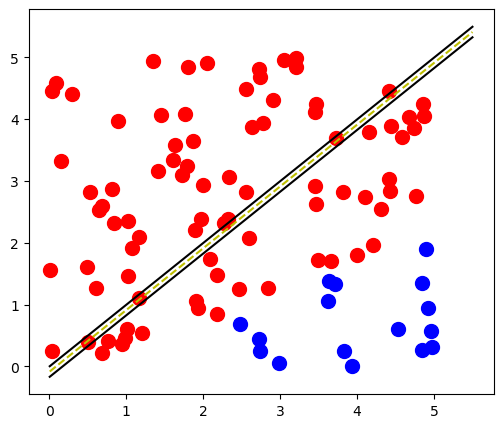

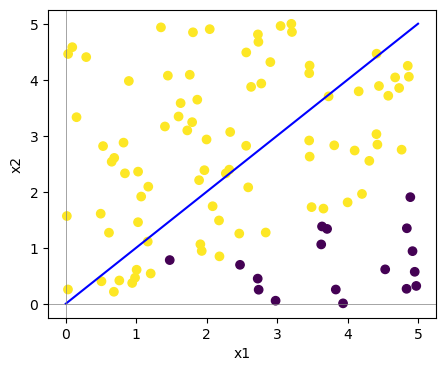

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           1       0.47      0.32      0.38        22

    accuracy                           0.23        30
   macro avg       0.23      0.16      0.19        30
weighted avg       0.34      0.23      0.28        30



In [236]:
svm.visualize()

# TODO - The weights are miltiplied by 1e14 for some reason. Above i've fixed it by deviding b by this. I might want to find out why this is.
plotting(TP3_2, b0=b*(1e-14), b1=w[0], b2=w[1], legend=False) 
report(test_1, w, b)